## 주성분 분석(PCA: Principal Component Analysis)
- 고차원 데이터를 저차원 데이터로 환원시키는 기법

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [165]:
df_all = pd.read_csv("../../Data/03.통합.csv")
df_all.head()

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7


In [120]:
df = pd.read_csv("../../Data/companies/통합_k.csv")

df_feature = df.iloc[:, :7]
# df.head()
df_feature

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,1821303,112129,286,739619,49143,248468.3,13718.5
1,1620640,84066,395,469392,48097,462443.1,532689.2
2,423864,29504,65,190166,12612,57288.6,6703.3
3,496161,25831,82,160821,13902,77411.6,59554.5
4,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...
131,226441,8607,40,85135,6103,28669.1,27669.5
132,243418,7481,44,79807,6405,39341.3,38725.4
133,217897,7835,32,73478,5554,22831.4,23634.2
134,94736,3989,23,40575,2856,20182.3,14025.4


In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7) # 구별이 확실한 주성분 7개 선택
pca.fit(df_feature) #7개만 학습

PCA(n_components=7)

In [122]:
pca.components_.shape

(7, 7)

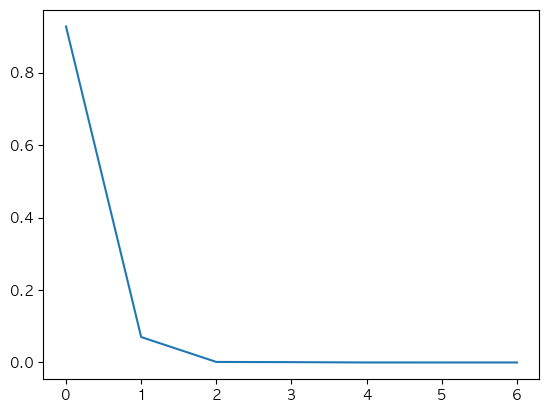

In [123]:
plt.plot(pca.explained_variance_ratio_)

> 2개가 베스트?

In [124]:
# '전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생',	'예금은행대출금액',	'예금액'
print(pca.explained_variance_ratio_)
print('sum:', sum(pca.explained_variance_ratio_))

[9.27341355e-01 7.01893533e-02 1.50304387e-03 9.25729814e-04
 3.69872025e-05 3.53040870e-06 4.89325218e-10]
sum: 1.0000000000000004


In [125]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df[['전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생',	'예금은행대출금액',	'예금액']].values # 독립변인들의 value값만 추출
y = df['cluster_id'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생',	'예금은행대출금액',	'예금액']
pd.DataFrame(x, columns=features).head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2.833561,3.704427,2.152969,3.391416,2.638342,1.130935,-0.396749
1,2.422746,2.552487,3.284688,1.810959,2.563537,2.632416,2.881050
2,-0.027402,0.312808,-0.141618,0.177870,0.025838,-0.210591,-0.441057
3,0.120611,0.162037,0.034889,0.006242,0.118092,-0.069386,-0.107251
4,-0.151550,-0.104407,0.076420,-0.137120,-0.162317,-0.285745,-0.246283


In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns=['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [135]:
print(pca.explained_variance_ratio_)

[0.85489805 0.13196426]


- PC값이 클수록 설명력이 높습니다.
- 전출인구, 초등학생 인원수

In [128]:
pca.explained_variance_ratio_

array([0.85489805, 0.13196426])

In [129]:
finalDf = pd.concat([principalDf, df], axis=1)
finalDf

,principal component1,principal component2,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
0,6.117947,-2.886808,1821303,112129,286,739619,49143,248468.3,13718.5,2
1,6.784952,1.305067,1620640,84066,395,469392,48097,462443.1,532689.2,1
2,-0.068545,-0.591570,423864,29504,65,190166,12612,57288.6,6703.3,3
3,0.119512,-0.187153,496161,25831,82,160821,13902,77411.6,59554.5,3
4,-0.364625,-0.135584,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...,...,...
131,-1.129383,0.039717,226441,8607,40,85135,6103,28669.1,27669.5,0
132,-1.071911,0.140004,243418,7481,44,79807,6405,39341.3,38725.4,0
133,-1.246358,0.039149,217897,7835,32,73478,5554,22831.4,23634.2,0
134,-1.620549,0.158190,94736,3989,23,40575,2856,20182.3,14025.4,0


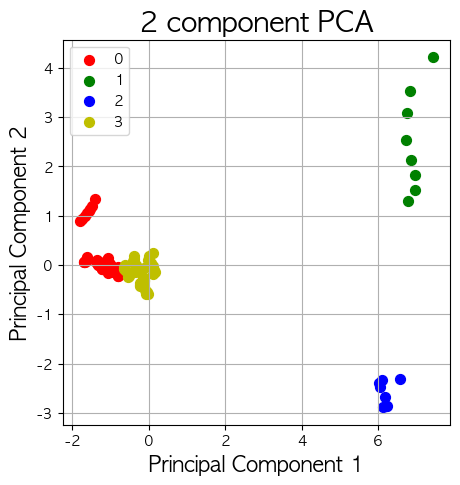

In [130]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0,1,2,3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [131]:
# pca의 eigen_vector
pca.components_

array([[ 0.40413975,  0.38359876,  0.40108328,  0.38001504,  0.40336107,
         0.3892737 ,  0.26459337],
       [-0.14835722, -0.31357051,  0.14576214, -0.36984634, -0.14328788,
         0.2879377 ,  0.78625137]])

---
## 주성분 두개로 예측

#### 검증세트

In [144]:
df2 = finalDf[['principal component1', 'principal component2', 'cluster_id']]
df2.head()

,principal component1,principal component2,cluster_id
0,6.117947,-2.886808,0.00
1,6.784952,1.305067,0.33
2,-0.068545,-0.591570,0.67
3,0.119512,-0.187153,0.67
4,-0.364625,-0.135584,0.67


In [141]:
from sklearn.model_selection import train_test_split

# Feature, Target
data = df2[['principal component1',	'principal component2']].to_numpy()
target = df2['cluster_id'].to_numpy()

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42
    
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

### randomforest

In [142]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [145]:
finalDf['cluster_id'] = finalDf['cluster_id'] + 10
df_km_temp = finalDf.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    finalDf['cluster_id'][finalDf['cluster_id'] == temp] = i
    i-=1
finalDf['cluster_id'] = np.round(finalDf['cluster_id'] / 3, 2)
finalDf['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

In [146]:
from sklearn.model_selection import train_test_split

# Feature, Target
data = df2[['principal component1',	'principal component2']].to_numpy()
target = df2['cluster_id'].to_numpy()

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42
    
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

### randomforest regression

In [147]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [148]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([2.11420202, 0.06593084, 0.05567288, 0.05303597, 0.05200529]),
 'score_time': array([0.01244187, 0.00831699, 0.0072732 , 0.0072    , 0.00718284]),
 'test_score': array([0.99999998, 1.        , 1.        , 0.99962969, 0.99846861])}

In [149]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9996196553224242

---
## 주성분 하나로 예측

In [154]:
df3 = finalDf[['principal component1', 'cluster_id']]
df3.head()

,principal component1,cluster_id
0,6.117947,0.00
1,6.784952,0.33
2,-0.068545,0.67
3,0.119512,0.67
4,-0.364625,0.67


## 선형 회귀

### 데이터셋 나누기

In [155]:
train_input, test_input, train_targer, test_target = \
    train_test_split(df3['principal component1'], df3['cluster_id'])

In [160]:
# 1열로 구성된 배열로 만들기
train_input = train_input.reshape(-1, 1) #(-1,1): 행은 있는 거 다 쓰고 열은 하나 만든다. 
test_input = test_input.values.reshape(-1, 1)

In [161]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_targer)
print(lr.score(train_input, train_targer))
print(lr.score(test_input, test_target))

0.8037177814720384
0.758340973471126


In [171]:
# 시도와 년도 붙이기
df_all[['년도', '시도']]
df4 = pd.concat([df_all[['년도', '시도']], df3], axis=1)
df4.head()

,년도,시도,principal component1,cluster_id
0,2013,경기도,6.117947,0.00
1,2013,서울특별시,6.784952,0.33
2,2013,경상남도,-0.068545,0.67
3,2013,부산광역시,0.119512,0.67
4,2013,대구광역시,-0.364625,0.67


In [176]:
gyeong = df4[df4['시도'] == '경기도']
gyeong.head()

,년도,시도,principal component1,cluster_id
0,2013,경기도,6.117947,0.0
17,2014,경기도,6.204826,0.0
34,2015,경기도,6.240885,0.0
51,2016,경기도,6.188671,0.0
68,2017,경기도,6.038700,0.0


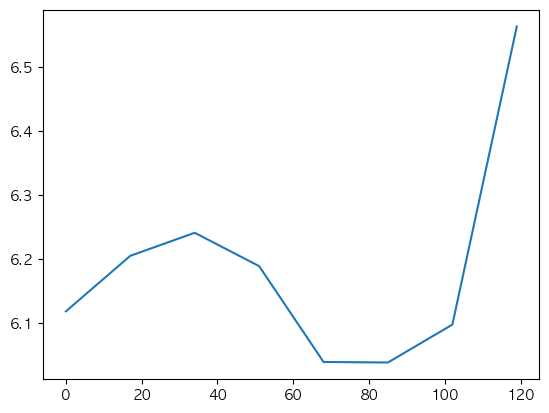

In [182]:
plt.plot(gyeong['principal component1'])

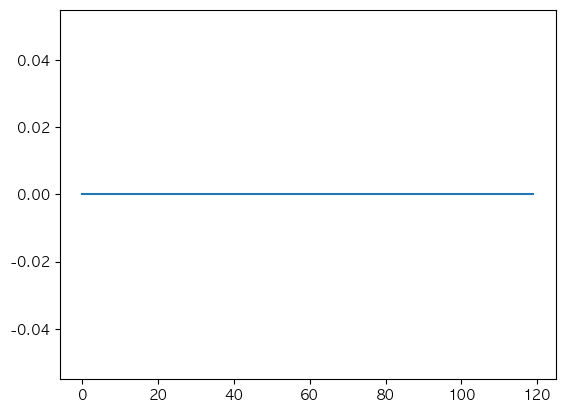

In [183]:
plt.plot(gyeong['cluster_id'])

In [187]:
lr.predict([[6.117947]])

array([0.12645298])

In [190]:
# 경기도로 테스트
pred_cluster = []

for i in gyeong['principal component1']:
    print(lr.predict([[i]]))
    pred_cluster.append(lr.predict([[i]]))

gyeong['pred_cluster'] = pred_cluster

[0.12645295]
[0.1169056]
[0.11294292]
[0.11868094]
[0.13516169]
[0.13524492]
[0.12872779]
[0.07747547]


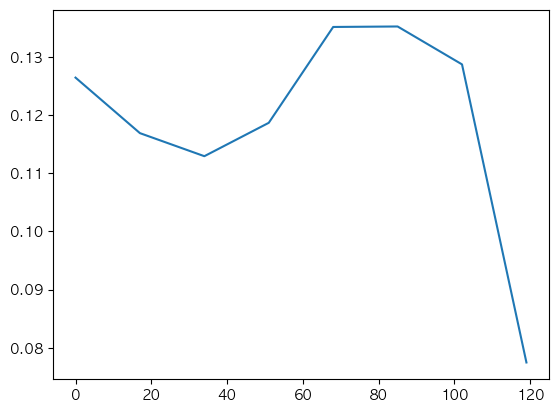

In [191]:
plt.plot(gyeong['pred_cluster'])

In [195]:
# 전체 데이터 예측 값 붙이기
pred_cluster = []

for i in df4['principal component1']:
    # print(lr.predict([[i]]))
    pred_cluster.append(lr.predict([[i]]))

df4['pred_cluster'] = pred_cluster
df4.head()

,년도,시도,principal component1,cluster_id,pred_cluster
0,2013,경기도,6.117947,0.00,[0.1264529480632124]
1,2013,서울특별시,6.784952,0.33,[0.05315359432660827]
2,2013,경상남도,-0.068545,0.67,[0.8063071104362324]
3,2013,부산광역시,0.119512,0.67,[0.7856408903843983]
4,2013,대구광역시,-0.364625,0.67,[0.8388442919829652]


In [206]:
df4[df4['시도'] == '경상북도']

,년도,시도,principal component1,cluster_id,pred_cluster
7,2013,경상북도,-0.547311,0.67,[0.8589202718608285]
24,2014,경상북도,-0.530249,0.67,[0.8570452885392741]
41,2015,경상북도,-0.511700,0.67,[0.8550068513063834]
58,2016,경상북도,-0.549159,0.67,[0.8591233879141262]
75,2017,경상북도,-0.584655,0.67,[0.8630241674675534]
92,2018,경상북도,-0.647358,0.67,[0.8699147976821439]
109,2019,경상북도,-0.645352,0.67,[0.8696942999187128]
126,2020,경상북도,-0.633527,0.67,[0.8683948519509403]


In [204]:
df4[df4['시도'] == '부산광역시']

,년도,시도,principal component1,cluster_id,pred_cluster
3,2013,부산광역시,0.119512,0.67,[0.7856408903843983]
20,2014,부산광역시,0.148961,0.67,[0.7824046669348259]
37,2015,부산광역시,0.145393,0.67,[0.7827967257097922]
54,2016,부산광역시,0.107696,0.67,[0.7869393601930004]
71,2017,부산광역시,0.051726,0.67,[0.7930900800142202]
88,2018,부산광역시,-0.024980,0.67,[0.8015196384987978]
105,2019,부산광역시,0.014773,0.67,[0.7971509931308546]
122,2020,부산광역시,0.114405,0.67,[0.7862021093705556]


In [200]:
df4[df4['시도'] == '경상남도'][['principal component1', 'pred_cluster']]

,principal component1,pred_cluster
2,-0.068545,[0.8063071104362324]
19,-0.028700,[0.8019284277198945]
36,-0.037065,[0.8028476155193311]
53,-0.101881,[0.8099705297903795]
70,-0.133444,[0.8134390354957223]
87,-0.234983,[0.8245974700071457]
104,-0.236748,[0.8247915246963199]
121,-0.231840,[0.8242521024569605]


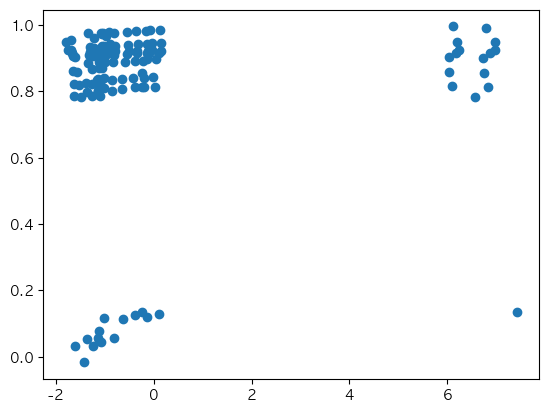

In [211]:
plt.scatter(x=df4['principal component1'], y=df4.sort_values(by='principal component1')['pred_cluster'])

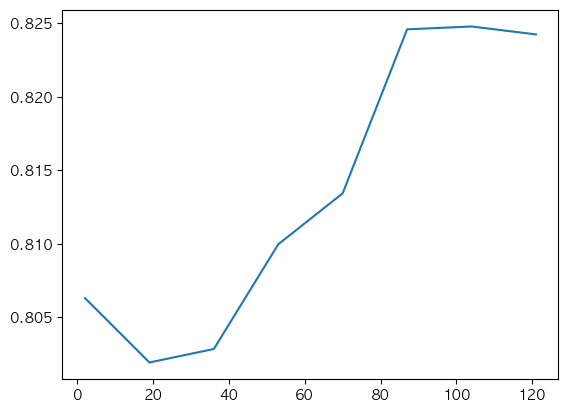

In [201]:
plt.plot(df4[df4['시도'] == '경상남도'][['pred_cluster']])

In [202]:
# Y = aX + b에서 기울기와 절편값을 출력(Deep Learning에서는 Weight, Bias로 불림)
print(lr.coef_, lr.intercept_) 

[-0.10989331] 0.7987744545736503


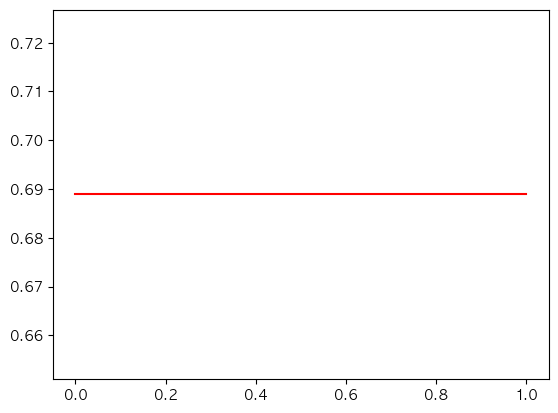

In [203]:
plt.plot([lr.coef_ + lr.intercept_, lr.coef_ + lr.intercept_], c='red')

---
## 년도별 클러스터 예측값 변화 그래프 (과거 데이터 한정)

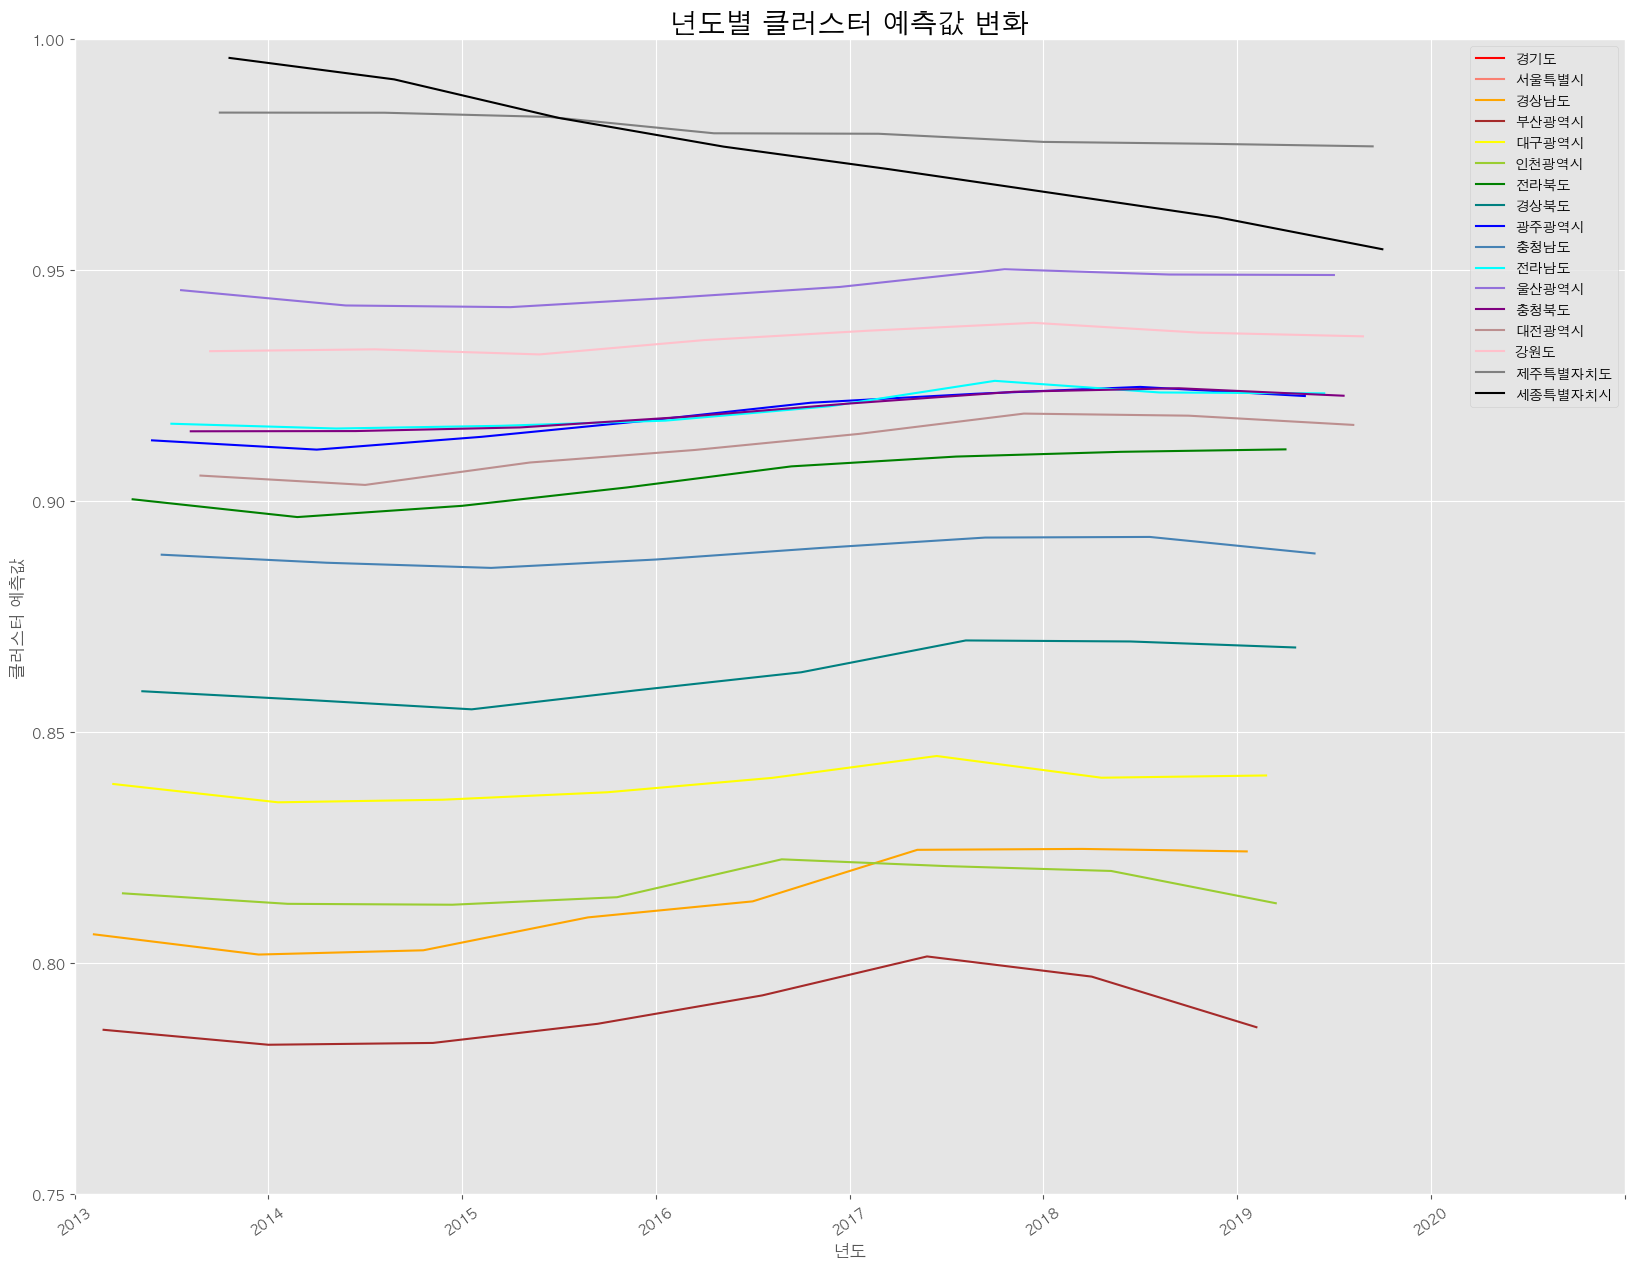

In [260]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df4.시도)
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']

for i in range(len(sido)):
    
    ax.plot(
        df4[df4['시도'] == sido[i]]['pred_cluster'],
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
ax.set_xlim(0,160)
ax.set_ylim(0.75,1.0)
ax.set_title('년도별 클러스터 예측값 변화', size=20)
ax.set_ylabel('클러스터 예측값')
ax.set_xlabel('년도')
ax.set_xticklabels(pd.unique(df4.년도), rotation=35)

plt.show()